In [1]:
#Importing all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plot
import warnings
warnings.simplefilter('ignore')
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

## Read Data and do Exploratory Data Analysis

In [2]:
data = pd.read_csv("day (1).csv")

In [3]:
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
data.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [5]:
data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
data.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

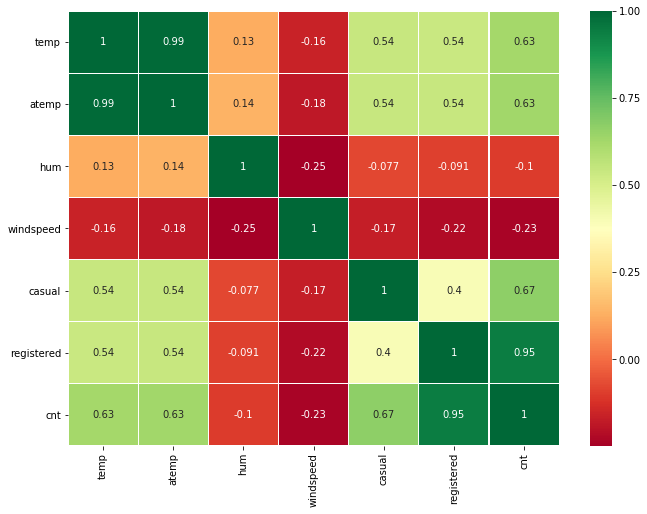

In [7]:
#Heat map of all continuous variables, ignored the categorical variables
data_corr = data[['temp','atemp','hum','windspeed','casual','registered','cnt']]
sns.heatmap(data_corr.corr(method='pearson'),annot=True, cmap='RdYlGn', linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(11,8)
plt.show()

In [8]:
#Take only required features, drop instant, dteday, atemp, casual and registered
data1=data[['season','yr','mnth','holiday','weekday','workingday','weathersit','temp','hum','windspeed','cnt']]

In [9]:
data1.shape

(731, 11)

In [10]:
data1.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.627894,0.190486,4504.348837
std,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.142429,0.077498,1937.211452
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.000000,0.022392,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.520000,0.134950,3152.000000
50%,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.626667,0.180975,4548.000000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.730209,0.233214,5956.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.972500,0.507463,8714.000000


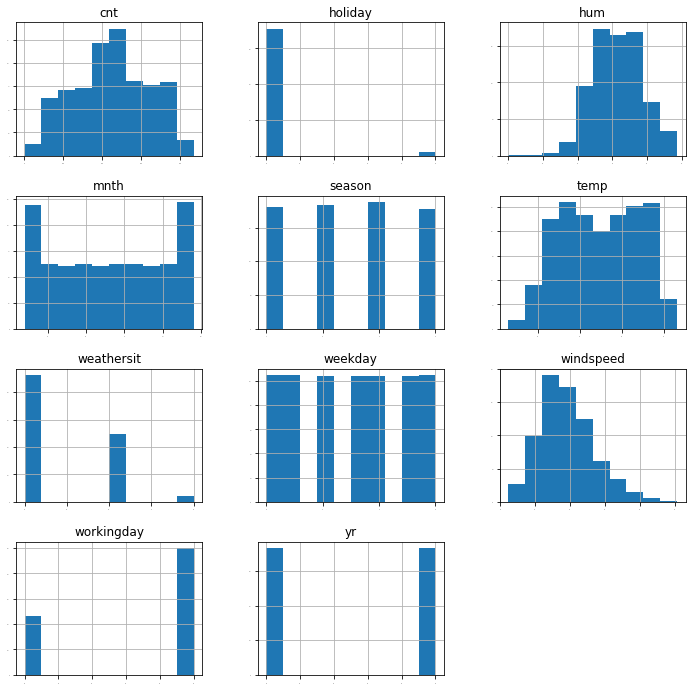

In [11]:
#Check ditribution of all features
data1.hist(sharex=False,sharey=False,xlabelsize=1,ylabelsize=1,figsize=(12,12))
plt.show()

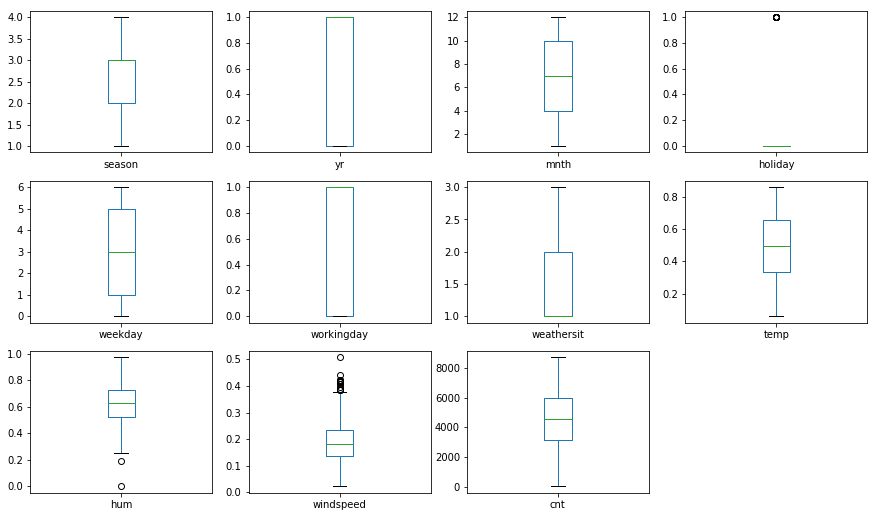

In [12]:
#Plot Box plot to detect outliers
data1.plot(kind='box', subplots=True,layout=(4,4), sharex=False, sharey=False, legend=True, fontsize=10, figsize=(15,12))
plt.show()

In [13]:
Q1 = data1[['temp','hum','windspeed']].quantile(0.25)
print(Q1)

temp         0.337083
hum          0.520000
windspeed    0.134950
Name: 0.25, dtype: float64


In [14]:
#Remove Outliers from  temp, hum and windspeed
Q1 = data1[['temp','hum','windspeed']].quantile(0.25)
Q2 = data1[['temp','hum','windspeed']].quantile(0.5)
Q3 = data1[['temp','hum','windspeed']].quantile(0.75)

IQR = Q3-Q1
Min = Q1-(1.5*IQR)
Max = Q3+(1.5*IQR)

print("IQR : ",IQR)
print("")
print("Min : ",Min)
print("")
print("Q1 : ",Q1)
print("")
print("Q2 : ",Q2)
print("")
print("Q3 : ",Q3)
print("")
print("Max : ",Max)

IQR :  temp         0.318333
hum          0.210209
windspeed    0.098265
dtype: float64

Min :  temp        -0.140416
hum          0.204687
windspeed   -0.012447
dtype: float64

Q1 :  temp         0.337083
hum          0.520000
windspeed    0.134950
Name: 0.25, dtype: float64

Q2 :  temp         0.498333
hum          0.626667
windspeed    0.180975
Name: 0.5, dtype: float64

Q3 :  temp         0.655417
hum          0.730209
windspeed    0.233214
Name: 0.75, dtype: float64

Max :  temp         1.132916
hum          1.045521
windspeed    0.380611
dtype: float64


In [15]:
#Check shape before removal of outliers
data1.shape

(731, 11)

In [16]:
#Take data backuo before removal of outliers
data_bkp=data1.copy()

In [17]:
#Remove Outliers
data1 = data1[~((data1[['temp','hum','windspeed']] < Min) | (data1[['temp','hum','windspeed']] > Max)).any(axis=1)]

In [18]:
#Check shape after removal of outliers
data1.shape

(717, 11)

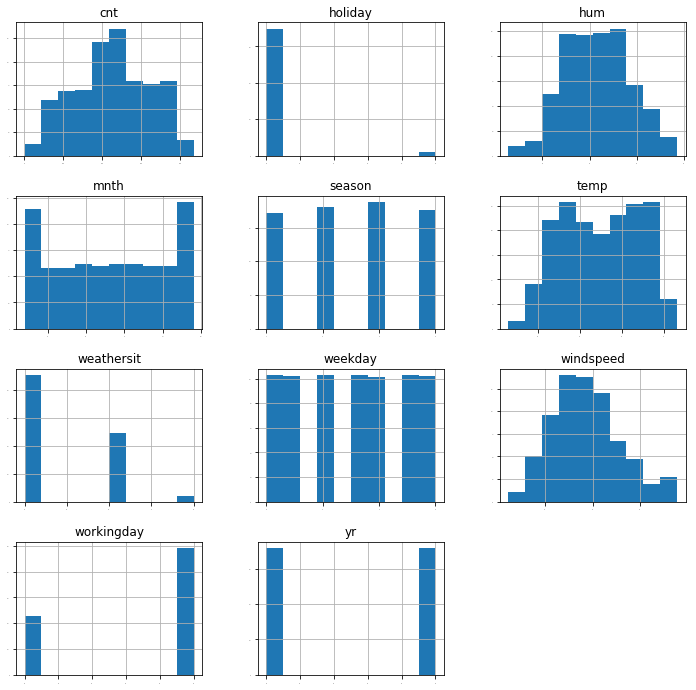

In [19]:
#Check ditribution of features after outliers removal (Mainly check temp, hum, windspeed)
data1.hist(sharex=False,sharey=False,xlabelsize=1,ylabelsize=1,figsize=(12,12))
plt.show()

In [20]:
X = data1.drop(['cnt'], axis=1)
Y = data1[['cnt']]

## Train Test Split and model building

In [21]:
seed = 42
test_size = 0.3
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = test_size,random_state = seed)

In [22]:
print(X_train.shape, " ", Y_train.shape, " ", X_test.shape, " ", Y_test.shape)

(501, 10)   (501, 1)   (216, 10)   (216, 1)


In [24]:
k_value = []
rmse_train_list = []
rmse_test_list =[]

for k in range(1,16):
    reg = KNeighborsRegressor(k)
    reg.fit(X_train, Y_train)
    
    Y_train_pred = reg.predict(X_train)
    Y_test_pred = reg.predict(X_test)
    
    rmse_train = np.sqrt(mean_squared_error(Y_train,Y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(Y_test,Y_test_pred))
    k_value.append(k)
    rmse_train_list.append(rmse_train)
    rmse_test_list.append(rmse_test)
print("DONE")

DONE


### Use the bike-sharing dataset (day.csv)

### 1. Plot number of K (of KNN) on the x-axis from 1 to 15 and y-axis RMSE 

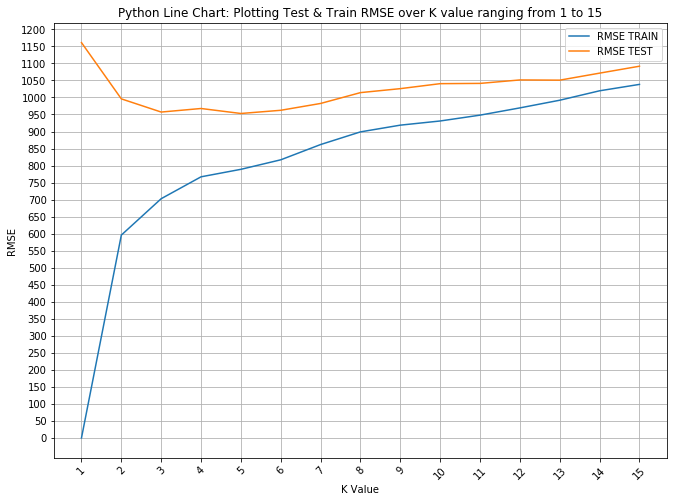

In [25]:
plot.plot(k_value, rmse_train_list, label='RMSE TRAIN')
plot.plot(k_value, rmse_test_list, label='RMSE TEST')
 
plot.xlabel('K Value')
plot.ylabel('RMSE')
plot.title('Python Line Chart: Plotting Test & Train RMSE over K value ranging from 1 to 15')
plot.xticks(k_value, k_value, fontsize=10, rotation=45)
plot.yticks(np.arange(0,1250, step=50))
plot.grid(True)
plot.legend()

fig = plot.gcf()
fig.set_size_inches(11,8)
plot.show()

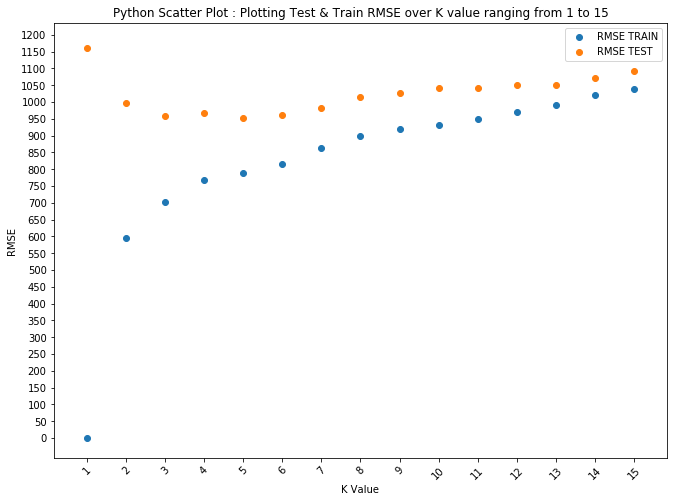

In [26]:
plot.scatter(k_value, rmse_train_list, label='RMSE TRAIN')
plot.scatter(k_value, rmse_test_list, label='RMSE TEST')
plot.xlabel('K Value')
plot.ylabel('RMSE')
plot.xticks(k_value, k_value, fontsize=10, rotation=45)
plot.yticks(np.arange(0,1250, step=50))
plot.title('Python Scatter Plot : Plotting Test & Train RMSE over K value ranging from 1 to 15')
plot.legend()

fig = plot.gcf()
fig.set_size_inches(11,8)
plot.show()

## Conclusion for question 1 : During intial K values, the model does overfit as there is big difference between train RMSE and test RMSE; but as K increases the difference between train and test RMSE reduces and K = 14 is an optimal value for this use case

### Use the bike-sharing dataset (day.csv)
### 2. Plot n_estimator (10 to 250) on the x-axis and the corresponding RMSE on the y-axis

In [28]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

reg = RandomForestRegressor()
param_dist = {"max_features": sp_randint(1, 10),
              "min_samples_split": sp_randint(2, 10),
              "max_depth": [2,3,4,5,6,7],
              "min_samples_leaf": sp_randint(2, 10)}

n_iter_search = 40
random_search = RandomizedSearchCV(reg, param_distributions=param_dist, cv=10,
                                   n_iter=n_iter_search)
random_search.fit(X,Y)

RandomizedSearchCV(cv=10, error_score='raise-deprecating',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=40, n_jobs=None,
          param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002A35B70D0F0>, 'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002A35B70D860>, 'max_depth': [2, 3, 4, 5, 6, 7], 'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002A35B3C6710>},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, 

In [29]:
random_search.best_params_

{'max_depth': 6,
 'max_features': 8,
 'min_samples_leaf': 2,
 'min_samples_split': 5}

In [30]:
n_estimators = []
rmse_train_list = []
rmse_test_list =[]

for n in range(10,251):
    reg = RandomForestRegressor(n_estimators=n,min_samples_split=7,max_features=7,max_depth=6,min_samples_leaf=5)
    reg.fit(X_train,  Y_train.values.ravel())
    
    Y_train_pred = reg.predict(X_train)
    Y_test_pred = reg.predict(X_test)
    
    rmse_train = np.sqrt(mean_squared_error(Y_train,Y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(Y_test,Y_test_pred))
    n_estimators.append(n)
    rmse_train_list.append(rmse_train)
    rmse_test_list.append(rmse_test)
print("DONE")

DONE


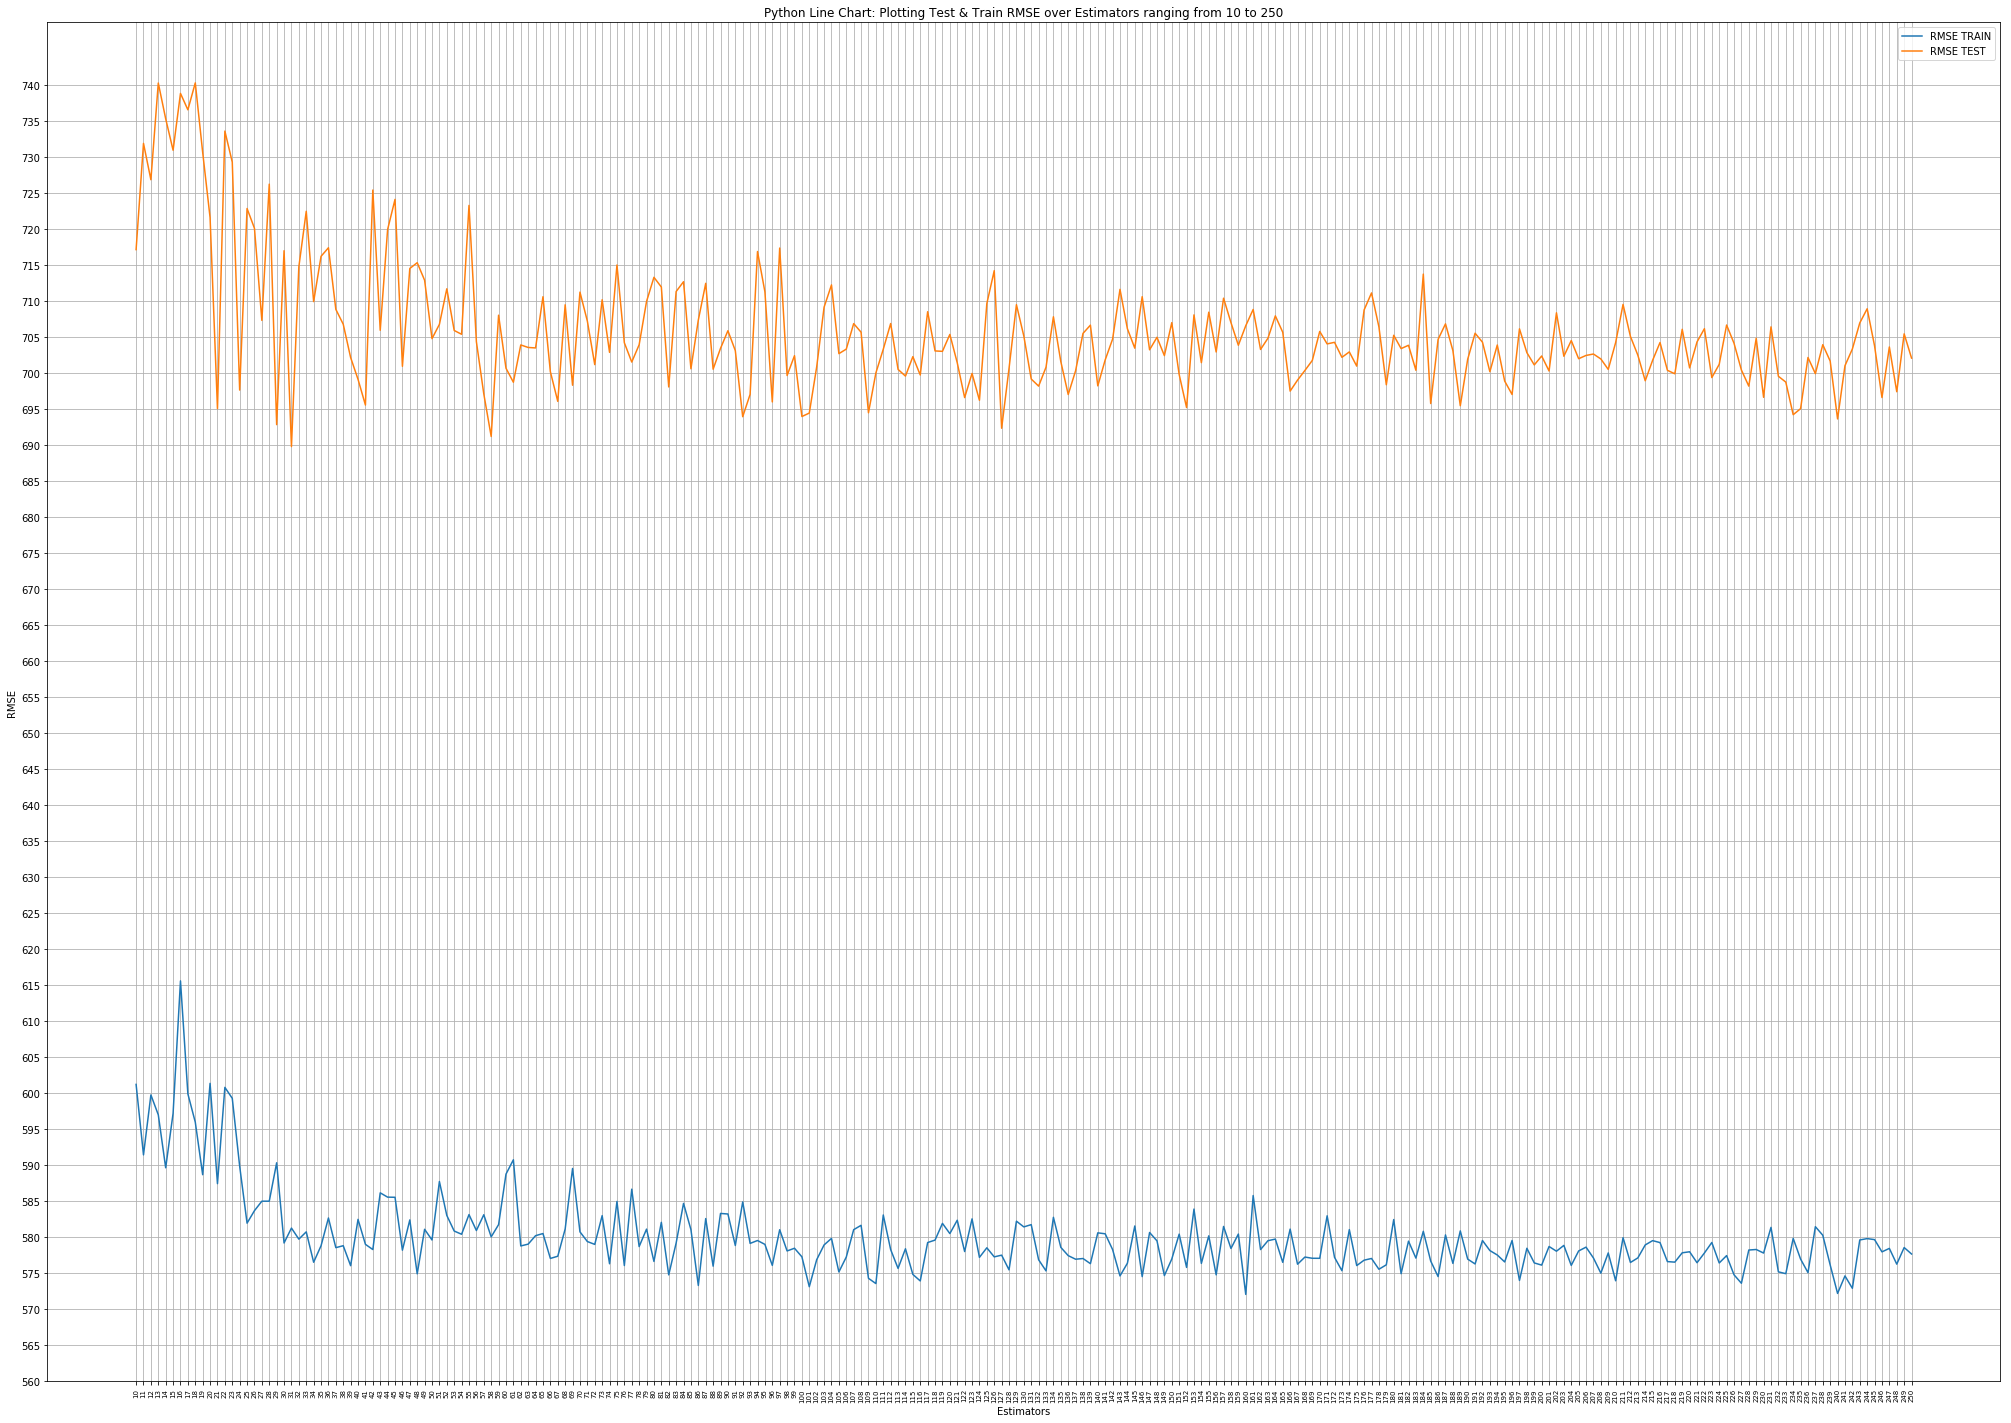

In [34]:
plot.plot(n_estimators, rmse_train_list, label='RMSE TRAIN')
plot.plot(n_estimators, rmse_test_list, label='RMSE TEST')
 
plot.xlabel('Estimators')
plot.ylabel('RMSE')
plot.title('Python Line Chart: Plotting Test & Train RMSE over Estimators ranging from 10 to 250')
plot.xticks(n_estimators, n_estimators, fontsize=7, rotation=90)
plot.yticks(np.arange(560,745, step=5))
plot.grid(True)
plot.legend()

fig = plot.gcf()
fig.set_size_inches(35,25)
plot.show()

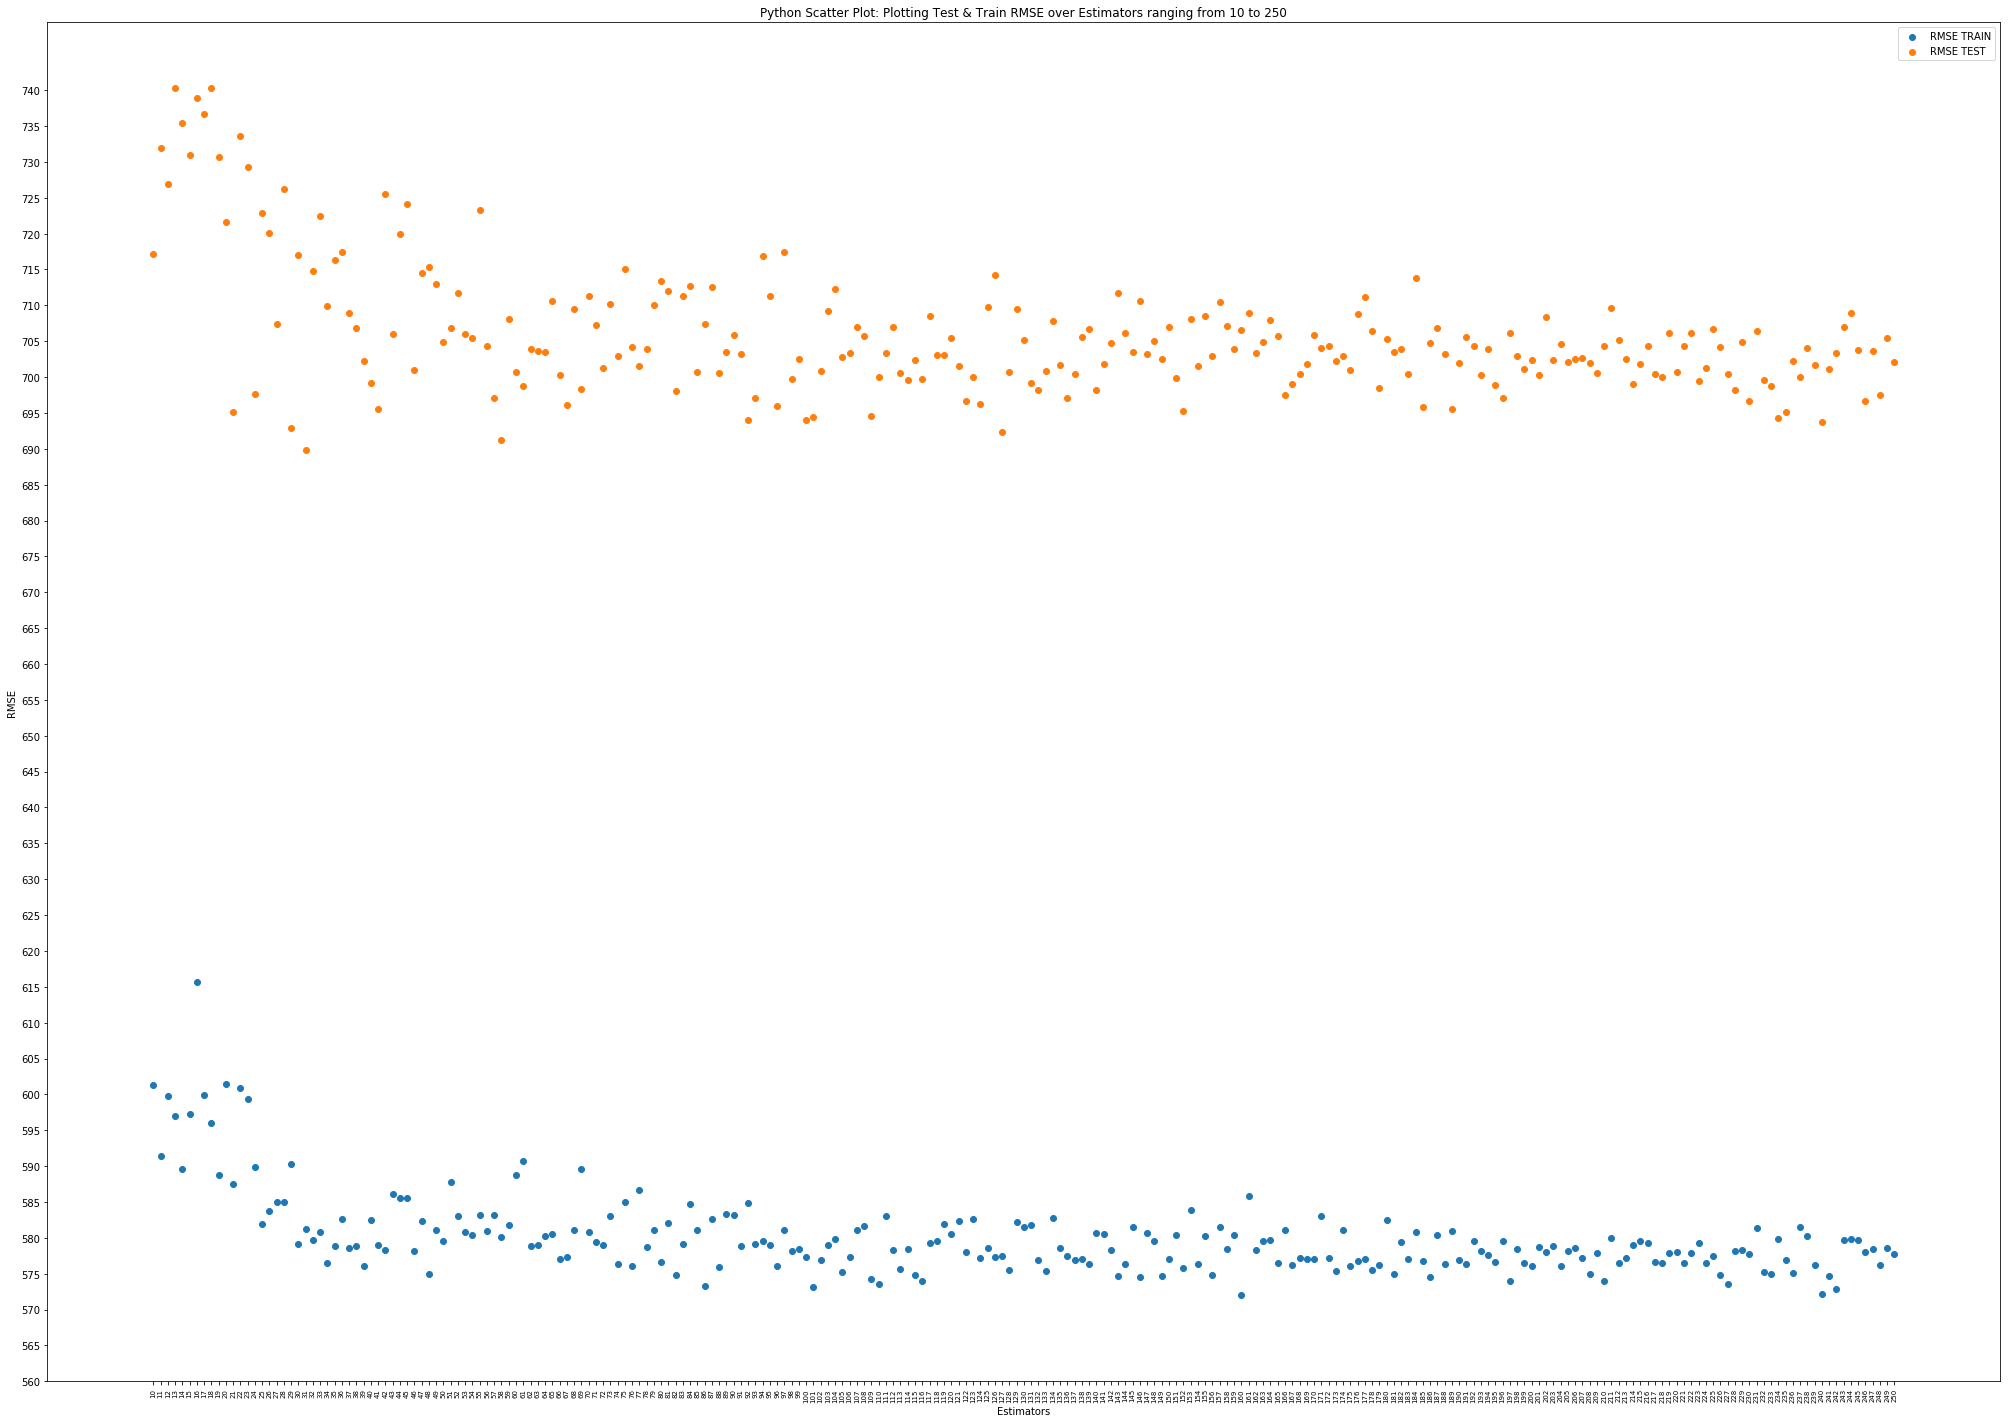

In [35]:
plot.scatter(n_estimators, rmse_train_list, label='RMSE TRAIN')
plot.scatter(n_estimators, rmse_test_list, label='RMSE TEST')
plot.xlabel('Estimators')
plot.ylabel('RMSE')
plot.xticks(n_estimators, n_estimators, fontsize=7, rotation=90)
plot.yticks(np.arange(560,745, step=5))
plot.title('Python Scatter Plot: Plotting Test & Train RMSE over Estimators ranging from 10 to 250')
plot.legend()

fig = plot.gcf()
fig.set_size_inches(35,25)
plot.show()

## Conclusion for question 2 : As the Test RMSE is more than train RMSE consistently, it indicates that its not a good model and is a case of overfitting. Hence some another algorithm needs to be applied to this use case